# Load the Keras Model

The model also pulls in the needed modules. 
But you can explicitly import them if you like.

In [20]:
from tensorflow import keras
import numpy as np
model = keras.models.load_model('model/v0.0a')

# Data 

I am going to use my original data, but if you had a folder of **unseen** data this would be very useful. Just remember it neeeds to be in the same **SHAPE** i.e. height/width/Colour-Bits as the trained model. If you need to *adjust* it - thats fine.

In [21]:
import pickle
with open('Image-Dev-01.pkl','rb') as ifp:    
    files,y_unique,X,y = pickle.load(ifp)

# Make a prediction

We will start off with just making 1 prediction.
This is useful so we can see exactly how to call the trained model. 
And... how we then get the output.

We have an "Unknown Imaage" (we are cheating as I am using my generated data)... it has to be in the correct size i.e. 100,100,1 

However as the original training model had 500 training images - the input size needs to be 
(1,100,100,1) - if not the model will not accept the input data.


We now call **model.predict** and we are passed back an array of likely classes. 

    [ 0.001, 0.002, 0.998] 
    
The predict *VERY STRONGLY* thinks this is **Class 3** or index [2]. So we look up in our **y_unique** list ... to see what this class name is. It should be *rect*.

Now can we find the string *rect* in the filename. If yes... we are correct - if not found this is a failure.

Testing Id 1072
File is   data/circle/Circle39.png
Classes are ['tri', 'circle', 'rect']
Class idx is 1
Class idx is circle
Src.         data/circle/Circle39.png


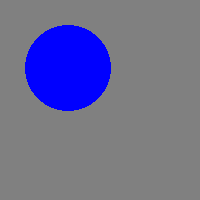

In [47]:
# Provide 1 object
from random import randint
from PIL import Image
test_id=randint(1,X.shape[0])
print(f"Testing Id {test_id}")
print(f"File is   {files[test_id]}")
print(f"Classes are {y_unique}")
ynew = model.predict(X[test_id:test_id+1])
# show the inputs and predicted outputs
# The outputs are the likelyhood of it being in a class.

# We can see how many possible classes are here
# It should be 150
ynew.shape

#Lets find the highest value's location
class_idx=np.argmax(ynew)
print(f"Class idx is {class_idx}")
print(f"Class idx is {y_unique[class_idx]}")
print(f"Src.         {files[test_id]}")
Image.open(files[test_id])

# Lets try 100 Predictions
Essentially the same code as previously - but without showing the image.

In [48]:
TESTS=100
correct=0
for n in range(0,TESTS):
    test_id=randint(1,X.shape[0]-1)
    ynew = model.predict(X[test_id:test_id+1])
    # show the inputs and predicted outputs
    # The outputs are the likelyhood of it being in a class.
    
    #Lets find the highest value's location
    class_idx=np.argmax(ynew)
    
    predicted_class_idx=np.argmax(ynew)
    predicted_class_str=y_unique[class_idx]
    
    if files[test_id].find(predicted_class_str)!=-1:
        correct+=1

print(f"Summary: Tests {TESTS}")
print(f"Correct: {correct}/{TESTS}")

Summary: Tests 100
Correct: 100/100
